In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# loading the dataset....

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


        EDA

        Data Preprocessing

In [4]:
# number of rows and columns in the dataset...
data.shape

(768, 9)

In [12]:
# statistics of the dataset..
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# number of missing values in the dataset...
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# replacing the 0 values with nan values to maintain the authenticity of the dataset...
data_copy = data.copy(deep=True)
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [14]:
# number of NaN values in the dataset after replacing 0 values with NaN...
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



     Data Visualization

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

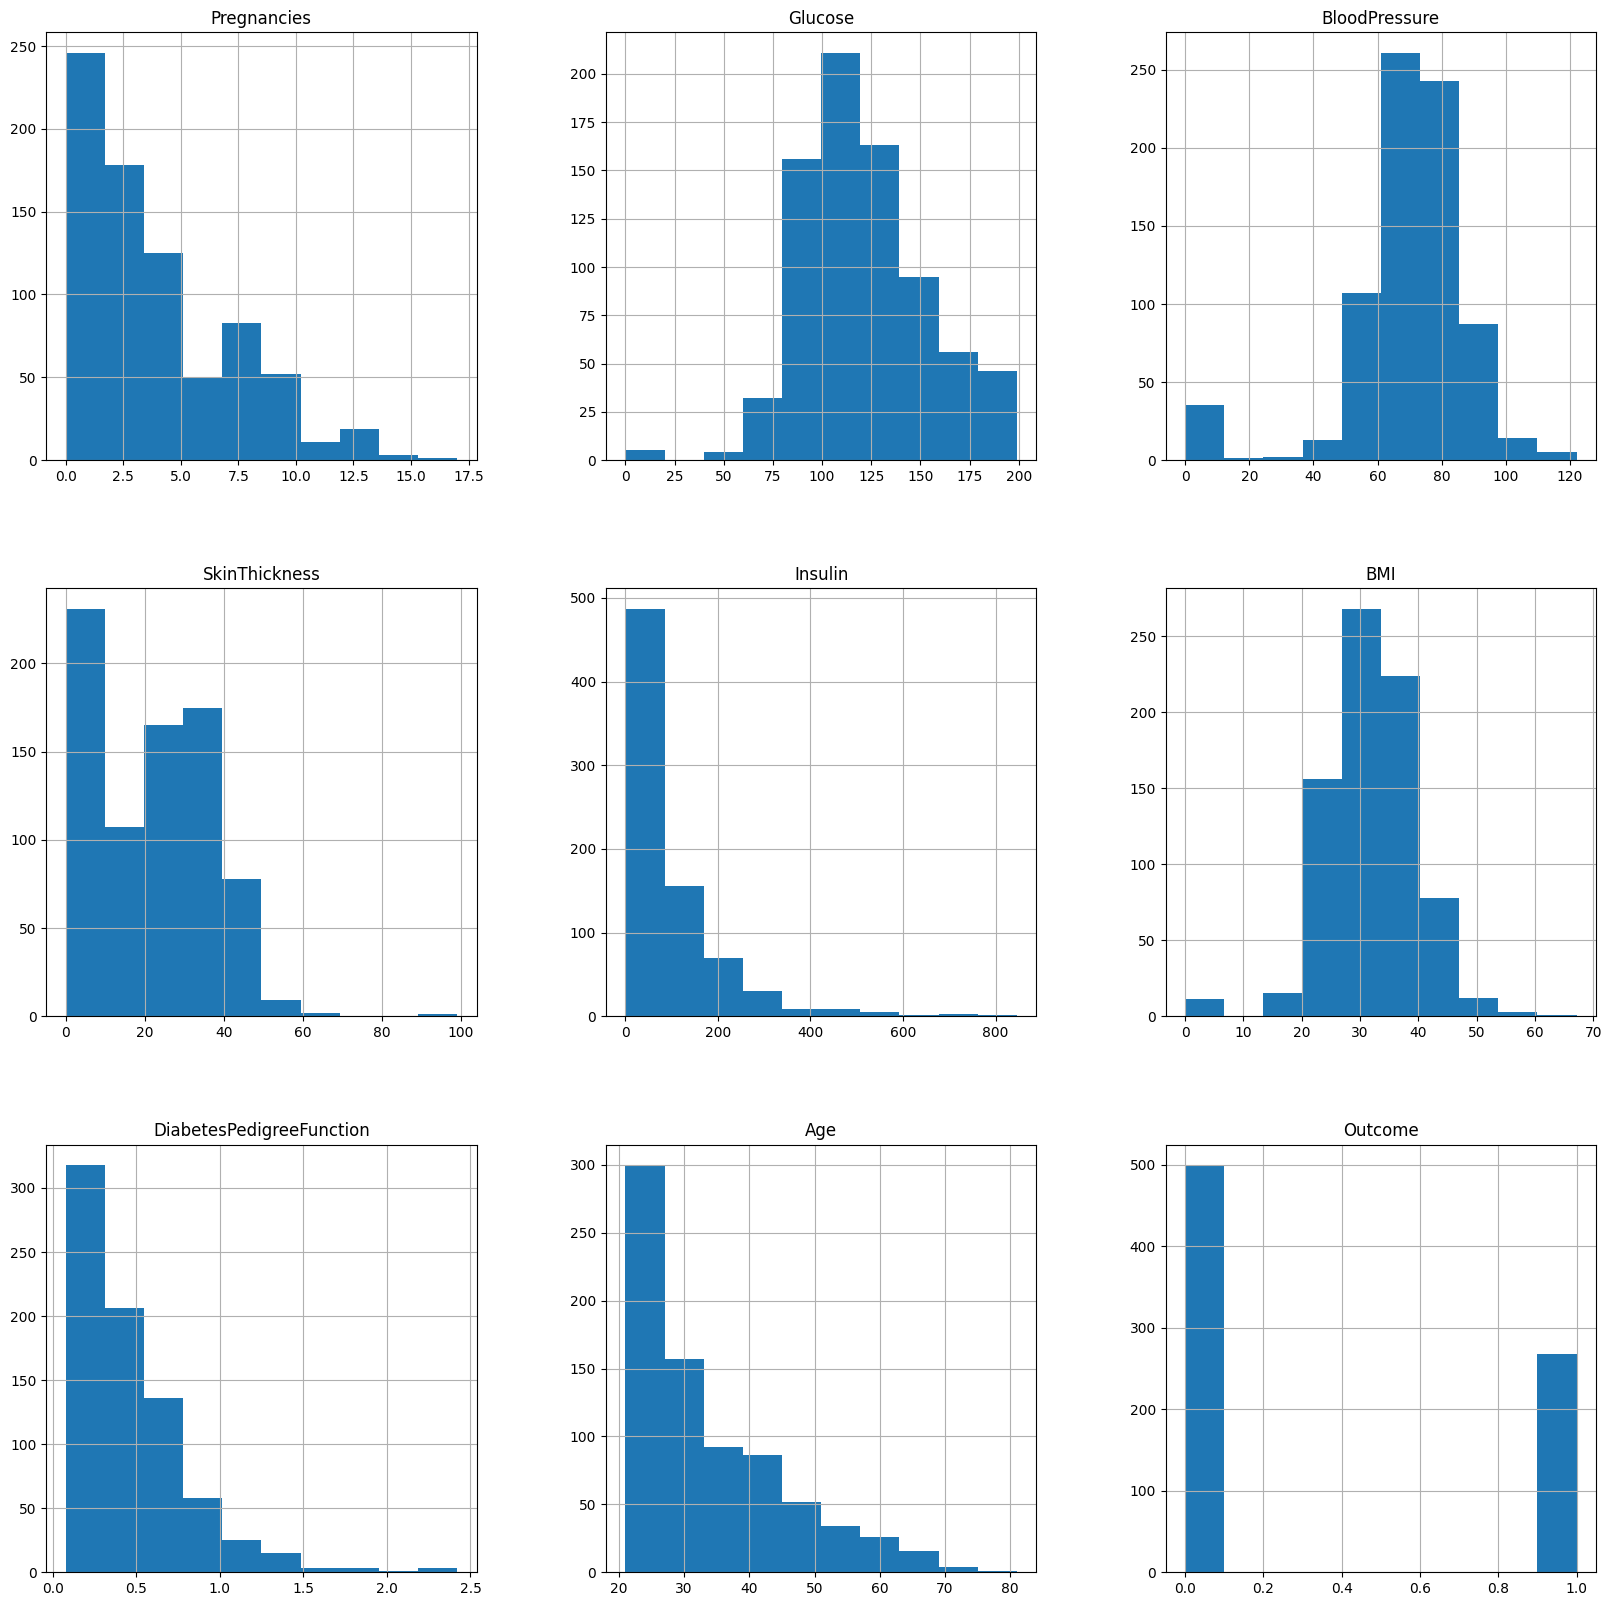

In [15]:
# Histogram of the overall dataset (without replacing 0 with NaN)

data.hist(figsize = (20, 20)) 

In [16]:
# filling the missing (NaN) attributes with their mean..

data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(), inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace=True)

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

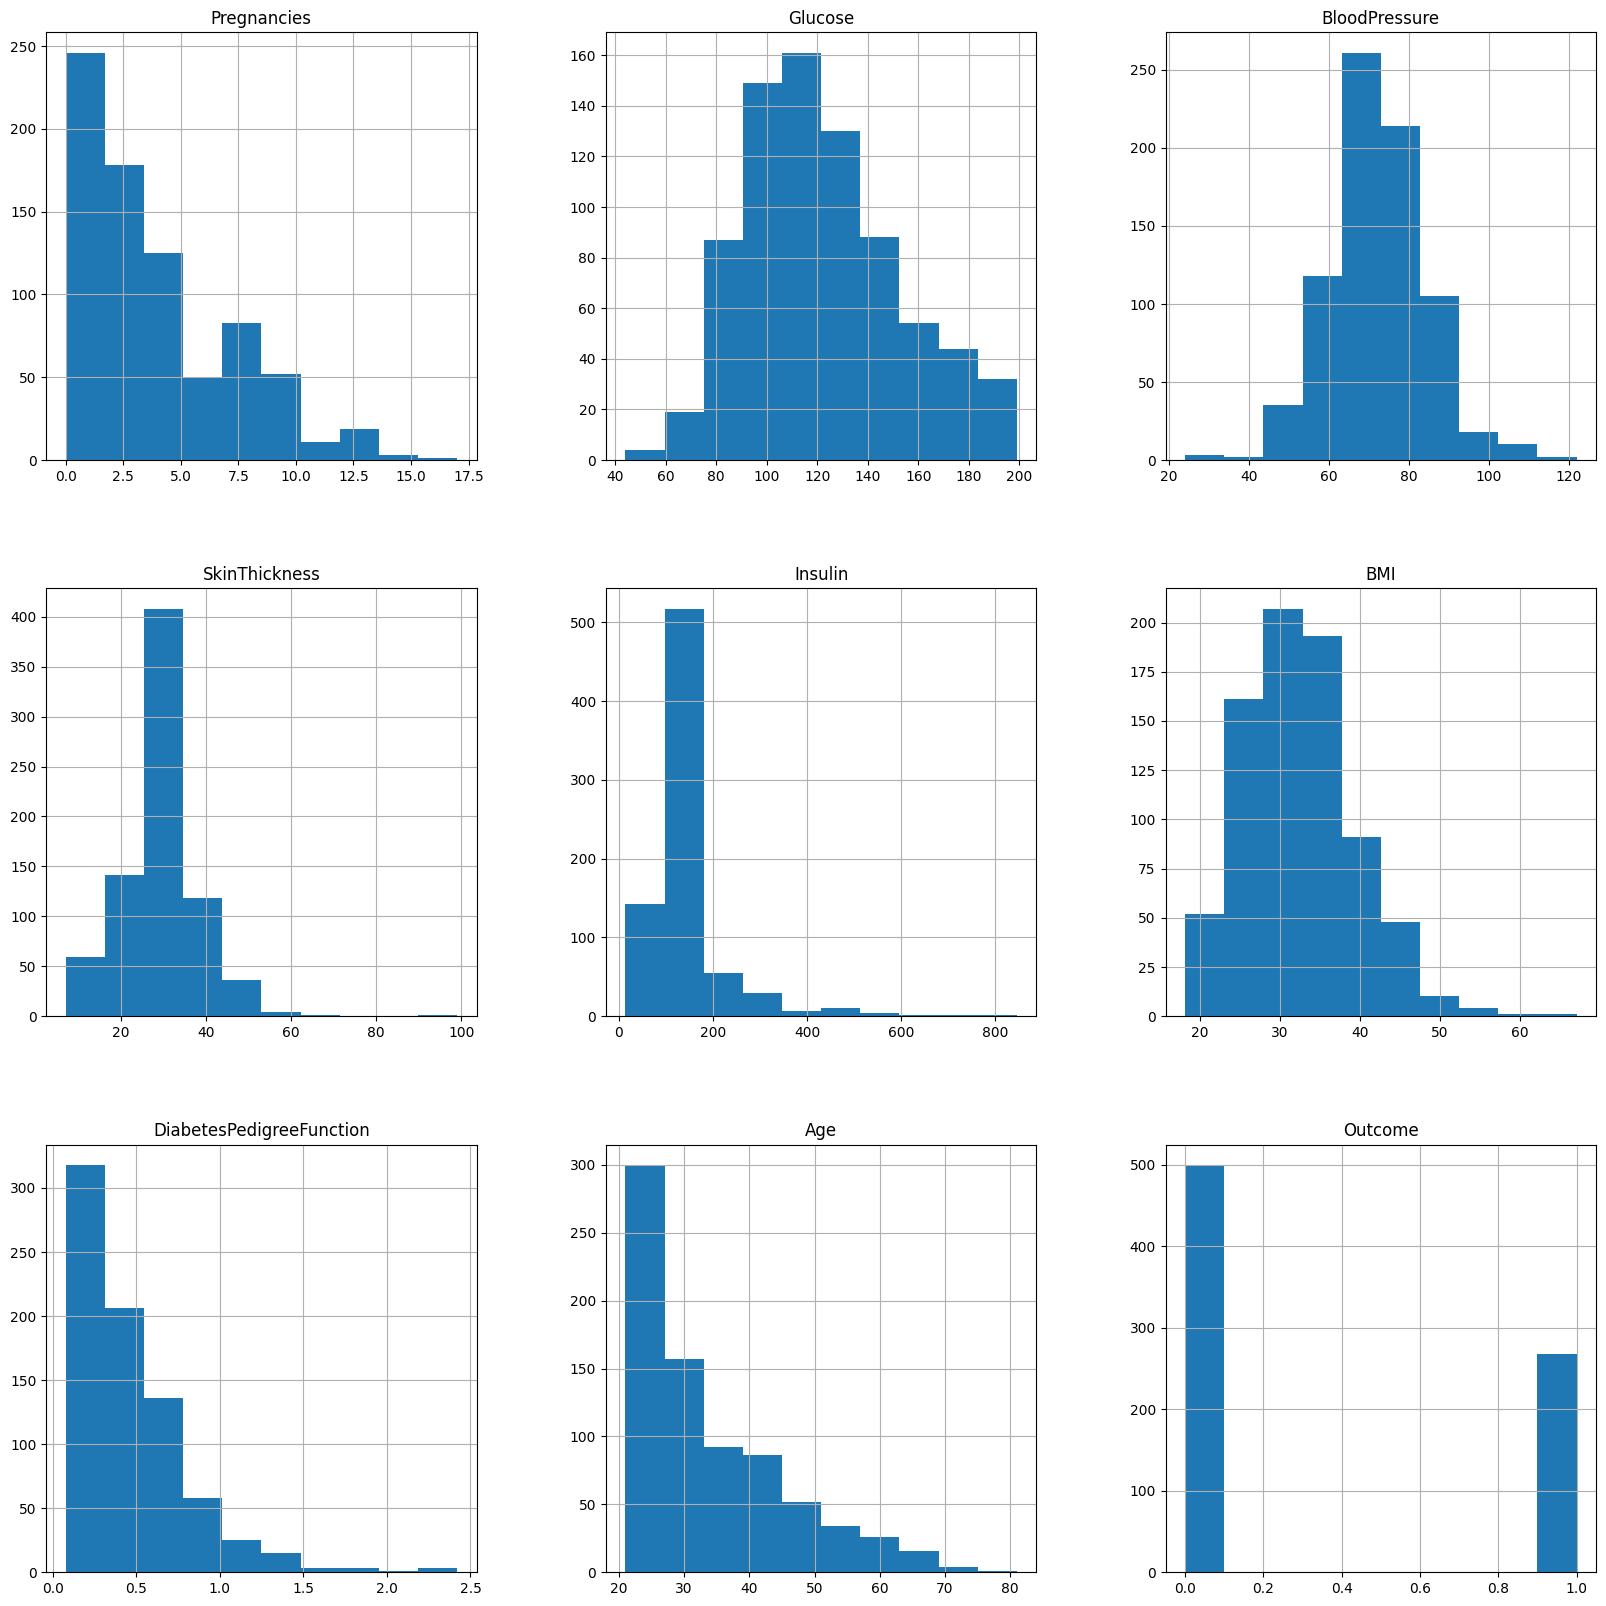

In [17]:
# Histogram of the dataset while replacing NaN values with the mean of their attributes..

data_copy.hist(figsize = (20, 20))

In [20]:
p = data['Outcome'].value_counts()
p

Outcome
0    500
1    268
Name: count, dtype: int64

<AxesSubplot: xlabel='Outcome'>

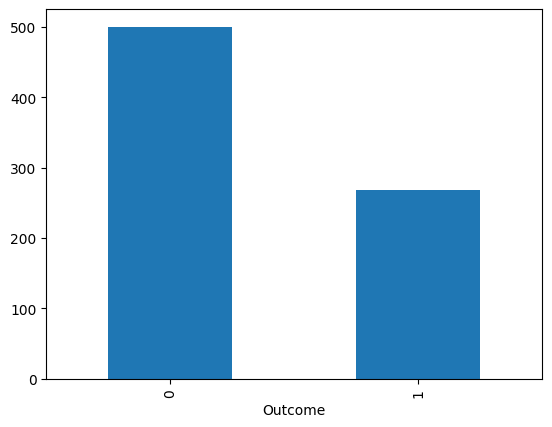

In [22]:
p.plot(kind="bar")

In [23]:
# 1 represents the diabetic patients
# 0 represents the non diabetic patients
# Here, number of patients who are diabetic is half of the patients who are non diabetic

C:\Users\MY PC\AppData\Local\Temp\ipykernel_21524\3903392509.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Insulin'])


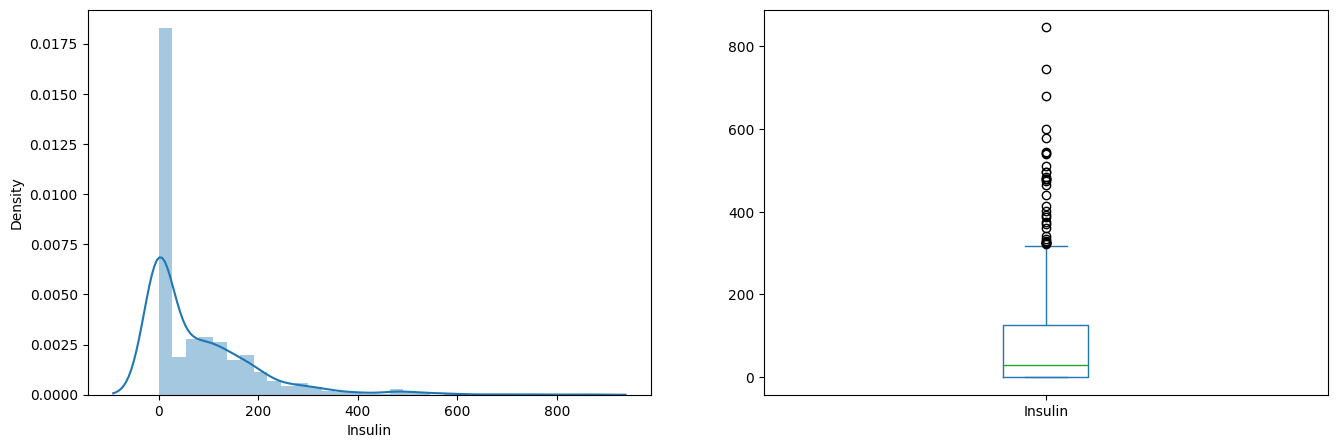

In [26]:
plt.subplot(121),
sns.distplot(data['Insulin'])
plt.subplot(122),
data['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [27]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

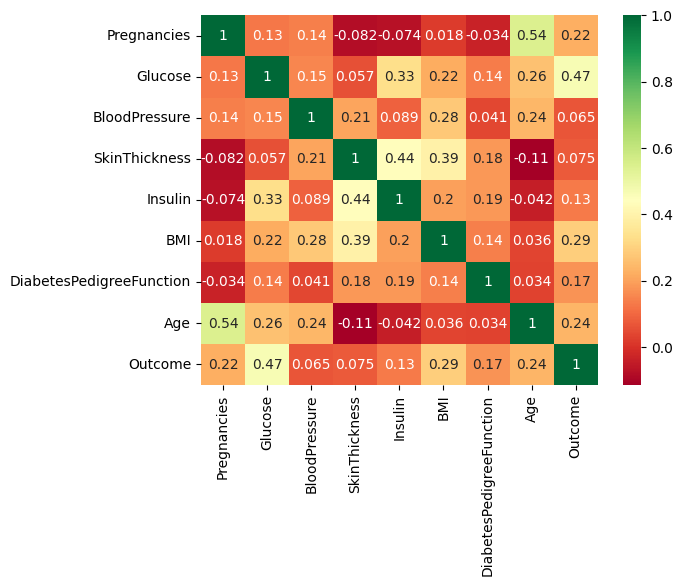

In [28]:
# Heatmap of the dataset
heatmap = sns.heatmap(correlation, annot=True, cmap='RdYlGn')
heatmap

In [31]:
# checking if all the attributes are standardized or not

if (data_copy.mean(axis=0) == 0).all() and (data_copy.std(axis=0) == 1).all():
    print("All the attributes are standardized")
else:
    print("All the attributes are not standardized")

All the attributes are not standardized


In [38]:
# Standardizing the dataset..
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data_copy.drop(['Outcome'], axis=1),), columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
standardized_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


         Modeling

In [39]:
# splitting the dataset
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [40]:
# splitting the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

In [43]:
# Building model
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
nb.fit(x_train, y_train)

GaussianNB()

In [55]:
knn_predict = knn.predict(x_test)
print("Accuracy score: ", format(metrics.accuracy_score(y_test,knn_predict)))
print(confusion_matrix(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

Accuracy score:  0.6929133858267716
[[129  33]
 [ 45  47]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       162
           1       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254



In [56]:
dt_predict = dt.predict(x_test)
print("Accuracy score: ", format(metrics.accuracy_score(y_test,dt_predict)))
print(confusion_matrix(y_test, dt_predict))
print(classification_report(y_test, dt_predict))

Accuracy score:  0.7047244094488189
[[126  36]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       162
           1       0.60      0.58      0.59        92

    accuracy                           0.70       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.70      0.70      0.70       254



In [57]:
nb_predict = nb.predict(x_test)
print("Accuracy score: ", format(metrics.accuracy_score(y_test,nb_predict)))
print(confusion_matrix(y_test, nb_predict))
print(classification_report(y_test, nb_predict))

Accuracy score:  0.7440944881889764
[[129  33]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       162
           1       0.65      0.65      0.65        92

    accuracy                           0.74       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.74      0.74      0.74       254



In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
xgb_pred = xgb.predict(x_test)
print("Accuracy score: ", format(metrics.accuracy_score(y_test, xgb_pred)))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

Accuracy score:  0.7283464566929134
[[128  34]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       162
           1       0.63      0.62      0.62        92

    accuracy                           0.73       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.73      0.73      0.73       254



In [61]:
# Most accurate results are from Naive Bayes. Hence, it is the best model for this prediction with accuracy 74.4%.

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [70]:
rfc_pred = rfc.predict(x_test)
print("Accuracy score: ", format(metrics.accuracy_score(y_test, rfc_pred)))
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

Accuracy score:  0.7637795275590551
[[137  25]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.62      0.66        92

    accuracy                           0.76       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



In [71]:
# After applying Random Forest, the most accurate results are from Random Forests with accuracy 76.3%.

In [72]:
# Getting feature importances...
rfc.feature_importances_

array([0.07761906, 0.25522465, 0.09189468, 0.07097048, 0.06965762,
       0.16779524, 0.12929939, 0.13753887])

<AxesSubplot: >

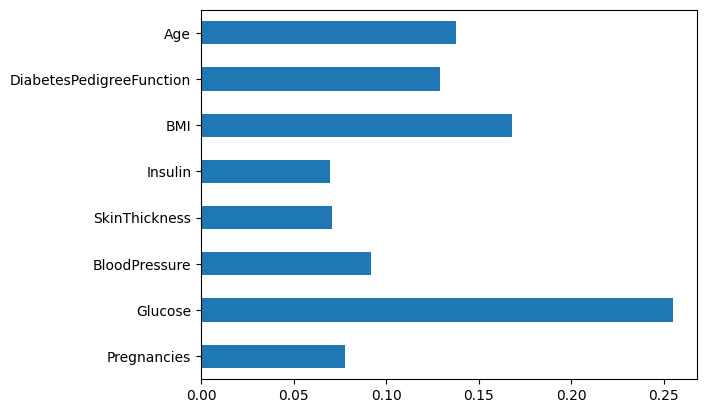

In [74]:
# plotting feature importances...
pd.Series(rfc.feature_importances_, index=x.columns).plot(kind='barh')

In [76]:
# Saving model
import pickle
saved_models = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_models)
rfc_from_pickle.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)